<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Gradiente_Descendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

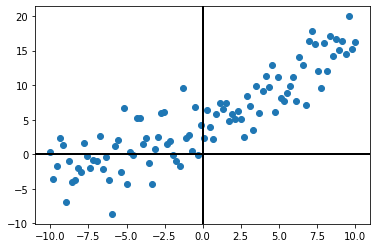

In [ ]:
np.random.seed(0)
dados = pd.DataFrame()
dados['x'] = np.linspace(-10,10,100)
dados['y'] = 5 + 1*dados['x'] + np.random.normal(0,3,100)

plt.scatter(dados['x'], dados['y'])
plt.axhline(y=0, linewidth=2, color = 'k')
plt.axvline(x=0, linewidth=2, color = 'k')
plt.show()

In [ ]:
def L(y, y_hat):
    return ((y-y_hat) ** 2).sum()


In [ ]:
class linear_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=1000, show_learning=False):
        self.learning_rate = learning_rate
        self.training_iters = training_iters
        self.show_learning = show_learning

        
    def fit(self, X_train, y_train, plot=False):
        
        # formata os dados
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # para plotar o aprendizado (é preciso conhecer a equação geradora)
        if self.show_learning:
            assert X.shape[1] <= 2 # só é possível viazualizar 2 parâmetros
            self.w1_loss = [L(y_train, 5 + i * X_train) for i in np.linspace(0,6,20)]
            self.b_loss = [L(y_train, i + 3 * X_train) for i in np.linspace(-10,20,20)]
        
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,5, size = X[0].shape)
        
        loss = [] # para plotar o aprendizado
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for point, yi in zip(X, y_train):
                gradient +=  (point * self.w_hat - yi) * point
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado
                  
            # atualiza os parâmetros
            self.w_hat -= gradient
            
            l = ((y_train - self.predict(X_train)) ** 2).sum() # calcula o custo
                        
            loss.append(l) # armazeno o custo para gráfico
        
            if self.show_learning:
                # mostra o estado atual do aprendizado
                self._show_state(X_train, y_train, loss) 
            
        
    def predict(self, X_test):
        # formata os dados
        if len(X_test.values.shape) < 2:
            X = X_test.values.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        return np.dot(X, self.w_hat) 
    
    
    def _show_state(self, X_train, y_train, loss):
        # visualiza o processo de aprendizado
        lb = L(y_train, self.w_hat[0] + 3 * X_train) # calcula o custo na direção b
        lw = L(y_train, 5 + self.w_hat[1] * X_train) # calcula o custo na direção w

        # scatter plot
        plt.subplot(221)
        plt.scatter(X_train, y_train, s= 10)
        plt.plot(X_train, self.predict(X_train), c='r')
        plt.title('$y = b + w x$')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # loss
        plt.subplot(222)
        plt.plot(range(len(loss)), loss)
        plt.title('Custo')
        plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
        plt.grid(True)

        # b_loss
        plt.subplot(223)
        plt.plot( np.linspace(-10,20,20), self.b_loss)
        plt.scatter(self.w_hat[0], lb, c = 'k')
        plt.title('Custo em $\hat{b}$')
        plt.tick_params(labelleft=False)
        plt.grid(True)
        
        # w_loss
        plt.subplot(224)
        plt.plot(np.linspace(0,6,20), self.w1_loss)
        plt.scatter(self.w_hat[1], lw, c = 'k')
        plt.title('Custo em $\hat{w}$')
        plt.grid(True)
        plt.tick_params(labelleft=False)
        
        plt.tight_layout()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico

In [ ]:
regr = linear_regr(learning_rate=0.0005, training_iters=30, show_learning=True)
regr.fit(dados['x'], dados['y'])

<Figure size 432x288 with 0 Axes>